### importation des bibliotheques 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importation et affichage des premieres lignes de la dataset

In [41]:
data = pd.read_csv('cancer_du_sein.csv')

In [42]:
data.shape

(569, 32)

In [43]:
data.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### visualisation de la matrice de correlation

<AxesSubplot:>

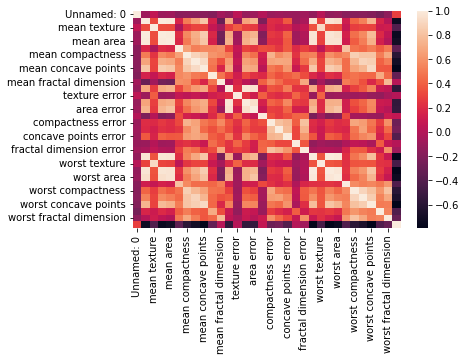

In [44]:
sns.heatmap(data.corr())

* nous pouvons bien voir que  la dataset possede beaucoup de variables fortement correlees

#### meilleur visualisation possible des classes de target dans l'espace

In [45]:
data.corr()['target'].sort_values(ascending=False)

target                     1.000000
Unnamed: 0                 0.283615
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0

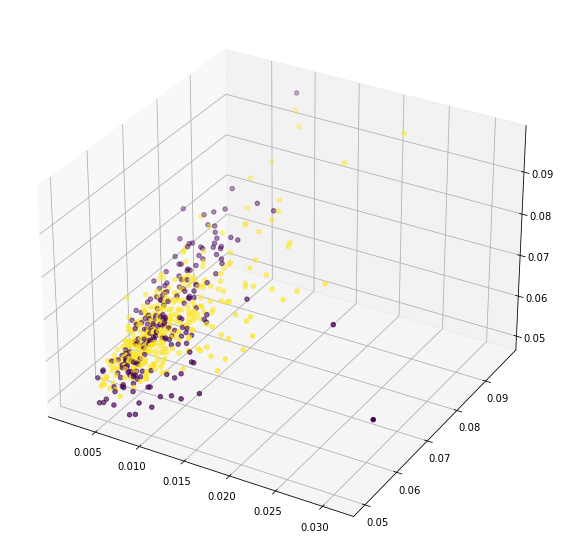

In [46]:
plt.figure(figsize=(10,10))
plt.axes(projection='3d').scatter(data['smoothness error'],
                                  data['mean fractal dimension'],
                                  data['mean fractal dimension'],
                                  c=data['target'])

## application de la PCA sur la dataset

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(3)

* ici nous selectionnons les trois premiers axes principaux

In [49]:
principal_components = pca.fit_transform(data)

* nous affichons le taux d'explication de chaque axes. par exemple le premier axes represente 92.7% des informations de la dataset

In [50]:
pca.explained_variance_ratio_

array([0.92735648, 0.05601014, 0.01495783])

### representation de la matrice de correlation des donnees apres application de l'acp

In [51]:
components = pd.DataFrame(data=principal_components,columns=['1','2','3'])

<AxesSubplot:>

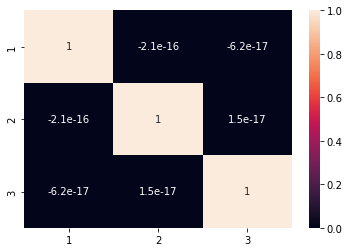

In [52]:
sns.heatmap(components.corr(),annot=True)

* nous constatons que les donnees resumes ne possedes plus de correlation entre elles

### Dispertion des donnees apres utilisation de l'ACP

NameError: name 'target' is not defined

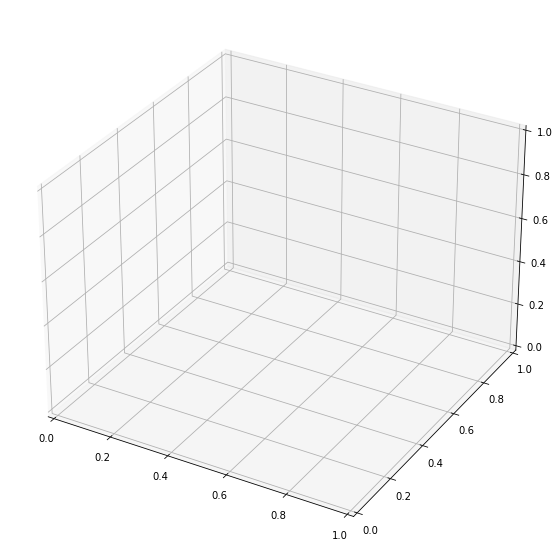

In [53]:
plt.figure(figsize=(10,10))
axe = plt.axes(projection='3d')
axe.scatter(components['1'],components['2'],components['3'],c=target,cmap='summer')

nous constatons egalement que les donnees sont mieux separes dans l'espace

### Correlation entre les donnees apres utilisation de l'ACP

In [ ]:
sns.heatmap(components.corr(),annot=True)